# 데이터 임포트

In [267]:
! mkdir data
! unzip /content/drive/MyDrive/projects/oden_anomalydetection/wando_sample.zip -d data

mkdir: cannot create directory ‘data’: File exists
unzip:  cannot find or open /content/drive/MyDrive/projects/oden_anomalydetection/wando_sample.zip, /content/drive/MyDrive/projects/oden_anomalydetection/wando_sample.zip.zip or /content/drive/MyDrive/projects/oden_anomalydetection/wando_sample.zip.ZIP.


In [290]:
import pandas as pd
import ast

In [ ]:
df1 = pd.read_excel("/home/youngchan/Documents/design1/data/wando01(8-21~9-14).xlsx")
df2 = pd.read_excel("/home/youngchan/Documents/design1/data/wando2(10-8~10-11).xlsx")

# df2 = pd.read_excel("data/wando2_oxygen(8.15~9.15).xlsx")
# df3 = pd.read_excel("data/wando2_oxygen(9.15~10.14).xlsx")

In [ ]:
# df = pd.concat([df1, df2, df3]).reset_index(drop=True)

In [ ]:
df1.isnull().sum()
df2.isnull().sum()

device_id        0
device_type      0
measure_time     0
serial_number    0
coordinates      0
temperature      0
oxygen_mpl       0
oxygen_per       0
oxygen_ppm       0
timestamp        0
date_time        0
dtype: int64

In [ ]:
df1.duplicated().sum()
df2.duplicated().sum()

0

# 데이터 전처리 및 EDA

In [295]:
import matplotlib.pyplot as plt

In [296]:
df1 = df1[['device_id', 'date_time', 'temperature', 'oxygen_ppm']]
df2 = df2[['device_id', 'date_time', 'temperature', 'oxygen_ppm']]

In [297]:
df1['date_time'] = pd.to_datetime(df1['date_time'])
df2['date_time'] = pd.to_datetime(df2['date_time'])

In [298]:
col_li = ['temperature', 'oxygen_ppm']

In [300]:
for col in col_li:
  # df1[col] = df1[col].apply(ast.literal_eval)
  # df1[col] = df1[col].apply(lambda x: x['value'])
  df2[col] = df2[col].apply(ast.literal_eval)
  df2[col] = df2[col].apply(lambda x: x['value'])

In [301]:
pd.to_datetime(df1['date_time'])
pd.to_datetime(df2['date_time'])

0      2024-10-11 23:59:30
1      2024-10-11 23:58:25
2      2024-10-11 23:57:21
3      2024-10-11 23:56:17
4      2024-10-11 23:53:04
               ...        
5259   2024-10-08 00:05:20
5260   2024-10-08 00:04:16
5261   2024-10-08 00:03:12
5262   2024-10-08 00:02:08
5263   2024-10-08 00:01:03
Name: date_time, Length: 5264, dtype: datetime64[ns]

In [302]:
abnormal_df = df2.reset_index(drop=True)
normal_df = df1.reset_index(drop=True)

In [303]:
abnormal_df.set_index('date_time', inplace=True)
abnormal_df['temperature'] = abnormal_df['temperature'].astype(float)
abnormal_df['oxygen_ppm'] = abnormal_df['oxygen_ppm'].astype(float)

# 2분 단위로 리샘플링 (평균값을 계산)
abnormal_df = abnormal_df.resample('2min').ffill().reset_index()
abnormal_df = abnormal_df.dropna()

normal_df.set_index('date_time', inplace=True)
# normal_df['temperature'] = normal_df['temperature'].astype(float)
# normal_df['oxygen_ppm'] = normal_df['oxygen_ppm'].astype(float)

# 2분 단위로 리샘플링 (평균값을 계산)
normal_df = normal_df.resample('2min').ffill().reset_index()
normal_df = normal_df.dropna()

In [304]:
print(normal_df['oxygen_ppm'].quantile(0.001))
print(normal_df['oxygen_ppm'].quantile(0.01))
print(normal_df['oxygen_ppm'].quantile(0.025))
print(normal_df['oxygen_ppm'].quantile(0.05))
print(normal_df['oxygen_ppm'].quantile(0.1))
print(normal_df['oxygen_ppm'].quantile(0.2))
print(normal_df['oxygen_ppm'].quantile(0.3))

0.8406302115917206
1.3711754083633425
1.7078164696693419
2.1324891328811644
2.611859083175659
3.0912118434906004
3.423110008239746


In [305]:
print(abnormal_df['oxygen_ppm'].quantile(0.1))
print(abnormal_df['oxygen_ppm'].quantile(0.125))
print(abnormal_df['oxygen_ppm'].quantile(0.15))
print(abnormal_df['oxygen_ppm'].quantile(0.175))
print(abnormal_df['oxygen_ppm'].quantile(0.2))
print(abnormal_df['oxygen_ppm'].quantile(0.3))
print(abnormal_df['oxygen_ppm'].quantile(0.7))
print(abnormal_df['oxygen_ppm'].quantile(0.9))
print(abnormal_df['oxygen_ppm'].quantile(0.95))

6.124280166625977
6.254892468452454
6.389222288131714
6.552041554450989
6.620785713195801
6.731968212127685
6.90379114151001
7.029090213775635
7.121846723556518


In [306]:
normal_df.describe()

,date_time,temperature,oxygen_ppm
count,17999,17999.000000,17999.000000
mean,2024-09-02 12:00:00,27.594372,3.687466
min,2024-08-21 00:02:00,25.736675,0.381487
25%,2024-08-27 06:01:00,27.026291,3.264778
50%,2024-09-02 12:00:00,27.730555,3.895073
75%,2024-09-08 17:59:00,28.070025,4.238256
max,2024-09-14 23:58:00,30.058685,5.160896
std,NaN,0.733670,0.770573


In [307]:
abnormal_df.describe()

,date_time,temperature,oxygen_ppm
count,2879,2879.000000,2879.000000
mean,2024-10-10 00:00:00.000000256,23.561814,6.666003
min,2024-10-08 00:02:00,22.898256,4.294001
25%,2024-10-09 00:01:00,23.333590,6.676414
50%,2024-10-10 00:00:00,23.628092,6.834730
75%,2024-10-10 23:59:00,23.748614,6.924245
max,2024-10-11 23:58:00,24.153313,7.245897
std,NaN,0.279590,0.538467


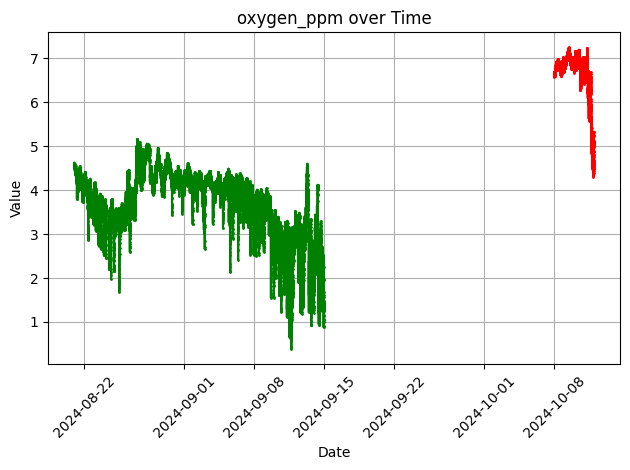

In [308]:
# 그래프 그리기
target = 'oxygen_ppm'
plt.plot(normal_df['date_time'], normal_df[target], marker='.', color='green', markersize=2)
plt.plot(abnormal_df['date_time'], abnormal_df[target], marker='.', color='red', markersize=2)
plt.title(f'{target} over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

oxygen ppm이 3이하가 지속될 경우 용존산소 센서 이상일 가능성이 매우 높다.

그리고 센서 이상이 생길 시 용존산소에 급격한 변화를 보이는 것으로 추정되는데,

wando2(normal_df)의 경우에도 10월 10일 이후 센서의 이상이 확인된다.

In [237]:
#normal_df2 = normal_df[normal_df['date_time']<='2024-10-13']
normal_df2 = normal_df.copy()

In [238]:
normal_df2

,date_time,device_id,temperature,oxygen_ppm
1,2024-09-14 00:02:00,wando02,28.495441,6.221558
2,2024-09-14 00:04:00,wando02,28.507576,6.231768
3,2024-09-14 00:06:00,wando02,28.525808,6.254777
4,2024-09-14 00:08:00,wando02,28.530111,6.261836
5,2024-09-14 00:10:00,wando02,28.540363,6.219744
...,...,...,...,...
17275,2024-10-07 23:50:00,wando02,23.244688,6.588605
17276,2024-10-07 23:52:00,wando02,23.247139,6.576092
17277,2024-10-07 23:54:00,wando02,23.250546,6.550016
17278,2024-10-07 23:56:00,wando02,23.249739,6.571185


# 학습용 데이터 구축

In [239]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Parameters
sequence_length = 720  # 1 day sequences (720 time steps of 2 minutes)
features = ['oxygen_ppm']

# Function to create sequences from the data
def create_sequences(df, label):
    df = df.sort_values('date_time').reset_index(drop=True)
    data = df[features].values
    sequences = []
    labels = []
    num_sequences = len(data) - sequence_length + 1
    for i in range(num_sequences):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
        labels.append(label)
    return sequences, labels

In [240]:
# Create sequences for normal data (label=0)
normal_sequences, normal_labels = create_sequences(normal_df2, label=0)

# Create sequences for abnormal data (label=1)
abnormal_sequences, abnormal_labels = create_sequences(abnormal_df, label=1)

In [241]:
# Combine normal and abnormal data
all_sequences = np.concatenate([normal_sequences, abnormal_sequences], axis=0)
all_labels = np.concatenate([normal_labels, abnormal_labels], axis=0)

# Shuffle the data
indices = np.arange(len(all_sequences))
np.random.shuffle(indices)
all_sequences = all_sequences[indices]
all_labels = all_labels[indices]

In [242]:
# Define PyTorch Dataset
class OxygenDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Create the dataset
dataset = OxygenDataset(all_sequences, all_labels)

# Example usage with DataLoader
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [243]:
from torch.utils.data import random_split

# Parameters for train/validation/test split
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Calculate lengths for each split
dataset_size = len(dataset)
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)
test_size = dataset_size - train_size - val_size  # Ensures no leftover samples

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for each split
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Example usage with train DataLoader
for batch_sequences, batch_labels in train_dataloader:
    # batch_sequences shape: [batch_size, sequence_length, num_features]
    # batch_labels shape: [batch_size]
    # Here you would pass batch_sequences to your GRU model for training
    pass  # Replace with your training code

In [244]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

13104 2808 2808


# AI 모델 학습

In [245]:
! mkdir checkpoint

mkdir: cannot create directory ‘checkpoint’: File exists


In [246]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Define GRU-based model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)  # out: [batch_size, seq_len, hidden_size]
        out = self.fc(out[:, -1, :])  # Use the last time step's output
        return out

# Model parameters
input_size = len(features)  # Number of features (e.g., temperature, oxygen_ppm)
hidden_size = 32
output_size = 2  # Binary classification (normal/abnormal)
num_layers = 1
epochs = 10
learning_rate = 0.001
best_val_loss = float('inf')
best_model_path = "checkpoint/best_gru_model.pth"

In [247]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model, define loss function and optimizer
model = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Learning rate scheduler to reduce learning rate if validation loss does not improve
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Early stopping parameters
early_stop_patience = 5
no_improvement_count = 0

# Lists to store loss values for plotting
train_losses = []
val_losses = []

Using device: cpu


/home/youngchan/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [248]:
# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Add tqdm for training progress visualization
    train_loader_tqdm = tqdm(train_dataloader, desc=f"Epoch [{epoch+1}/{epochs}] Training")
    for batch_sequences, batch_labels in train_loader_tqdm:
        batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_sequences)
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_labels).sum().item()
        total_predictions += batch_labels.size(0)

    # Calculate training loss and accuracy
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        val_loader_tqdm = tqdm(val_dataloader, desc=f"Epoch [{epoch+1}/{epochs}] Validation")
        for batch_sequences, batch_labels in val_loader_tqdm:
            batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device)
            outputs = model(batch_sequences)
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == batch_labels).sum().item()
            total_predictions += batch_labels.size(0)

    # Calculate validation loss and accuracy
    val_epoch_loss = val_loss / len(val_dataloader)
    val_epoch_accuracy = correct_predictions / total_predictions
    val_losses.append(val_epoch_loss)
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy:.4f}")

    # Save the best model based on validation loss
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved with validation loss: {best_val_loss:.4f}")
        print("===============================================================================================")
        no_improvement_count = 0  # Reset early stopping counter
    else:
        no_improvement_count += 1

    # Reduce learning rate if validation loss does not improve
    scheduler.step(val_epoch_loss)

    # Early stopping check
    if no_improvement_count >= early_stop_patience:
        print(f"Early stopping triggered after {epoch+1} epochs.")
        break

Epoch [1/10] Training: 100%|██████████████████| 205/205 [01:20<00:00,  2.56it/s]


Epoch [1/10], Loss: 0.3764, Accuracy: 0.8833


Epoch [1/10] Validation: 100%|██████████████████| 44/44 [00:02<00:00, 16.53it/s]


Validation Loss: 0.3529, Validation Accuracy: 0.8871
Best model saved with validation loss: 0.3529


Epoch [2/10] Training: 100%|██████████████████| 205/205 [00:45<00:00,  4.53it/s]


Epoch [2/10], Loss: 0.3597, Accuracy: 0.8833


Epoch [2/10] Validation: 100%|██████████████████| 44/44 [00:02<00:00, 16.15it/s]


Validation Loss: 0.3503, Validation Accuracy: 0.8871
Best model saved with validation loss: 0.3503


Epoch [3/10] Training: 100%|██████████████████| 205/205 [00:40<00:00,  5.05it/s]


Epoch [3/10], Loss: 0.3215, Accuracy: 0.8829


Epoch [3/10] Validation: 100%|██████████████████| 44/44 [00:02<00:00, 16.56it/s]


Validation Loss: 0.2328, Validation Accuracy: 0.8871
Best model saved with validation loss: 0.2328


Epoch [4/10] Training: 100%|██████████████████| 205/205 [00:39<00:00,  5.15it/s]


Epoch [4/10], Loss: 0.2485, Accuracy: 0.8795


Epoch [4/10] Validation: 100%|██████████████████| 44/44 [00:02<00:00, 18.76it/s]


Validation Loss: 0.2168, Validation Accuracy: 0.8871
Best model saved with validation loss: 0.2168


Epoch [5/10] Training: 100%|██████████████████| 205/205 [00:45<00:00,  4.50it/s]


Epoch [5/10], Loss: 0.2118, Accuracy: 0.8842


Epoch [5/10] Validation: 100%|██████████████████| 44/44 [00:01<00:00, 32.21it/s]


Validation Loss: 0.1911, Validation Accuracy: 0.9110
Best model saved with validation loss: 0.1911


Epoch [6/10] Training: 100%|██████████████████| 205/205 [00:46<00:00,  4.37it/s]


Epoch [6/10], Loss: 0.2002, Accuracy: 0.8997


Epoch [6/10] Validation: 100%|██████████████████| 44/44 [00:01<00:00, 28.82it/s]


Validation Loss: 0.1725, Validation Accuracy: 0.9320
Best model saved with validation loss: 0.1725


Epoch [7/10] Training: 100%|██████████████████| 205/205 [00:44<00:00,  4.61it/s]


Epoch [7/10], Loss: 0.3038, Accuracy: 0.8698


Epoch [7/10] Validation: 100%|██████████████████| 44/44 [00:01<00:00, 34.72it/s]


Validation Loss: 0.3470, Validation Accuracy: 0.8871


Epoch [8/10] Training: 100%|██████████████████| 205/205 [00:48<00:00,  4.20it/s]


Epoch [8/10], Loss: 0.3273, Accuracy: 0.8833


Epoch [8/10] Validation: 100%|██████████████████| 44/44 [00:01<00:00, 33.65it/s]


Validation Loss: 0.2736, Validation Accuracy: 0.8871


Epoch [9/10] Training: 100%|██████████████████| 205/205 [00:48<00:00,  4.22it/s]


Epoch [9/10], Loss: 0.2511, Accuracy: 0.8774


Epoch [9/10] Validation: 100%|██████████████████| 44/44 [00:02<00:00, 16.44it/s]


Validation Loss: 0.2131, Validation Accuracy: 0.8985


Epoch [10/10] Training: 100%|█████████████████| 205/205 [00:46<00:00,  4.37it/s]


Epoch [10/10], Loss: 0.2956, Accuracy: 0.8683


Epoch [10/10] Validation: 100%|█████████████████| 44/44 [00:02<00:00, 16.70it/s]

Validation Loss: 0.3402, Validation Accuracy: 0.8871


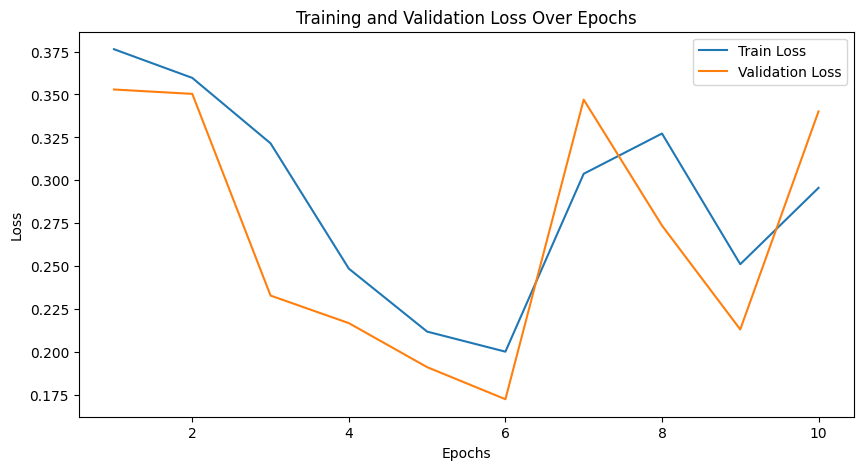

In [249]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# 검증

In [196]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [197]:
# Testing loop
all_labels = []
all_predictions = []
test_loss = 0.0
correct_predictions = 0
total_predictions = 0
model.eval()

# Load the best model for testing
if os.path.exists(best_model_path):
    model.load_state_dict(torch.load(best_model_path))
    print("Loaded the best model for testing.")

Loaded the best model for testing.


/tmp/ipykernel_130508/1894909068.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


In [198]:
with torch.no_grad():
    test_loader_tqdm = tqdm(test_dataloader, desc="Testing")
    for batch_sequences, batch_labels in test_loader_tqdm:
        batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device)
        outputs = model(batch_sequences)
        loss = criterion(outputs, batch_labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_labels).sum().item()
        total_predictions += batch_labels.size(0)
        all_labels.extend(batch_labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calculate test loss and accuracy
test_epoch_loss = test_loss / len(test_dataloader)
test_epoch_accuracy = correct_predictions / total_predictions
print(f"Test Loss: {test_epoch_loss:.4f}, Test Accuracy: {test_epoch_accuracy:.4f}")

Testing: 100%|██████████████████████████████████| 41/41 [00:01<00:00, 30.70it/s]

Test Loss: 0.1510, Test Accuracy: 0.9634


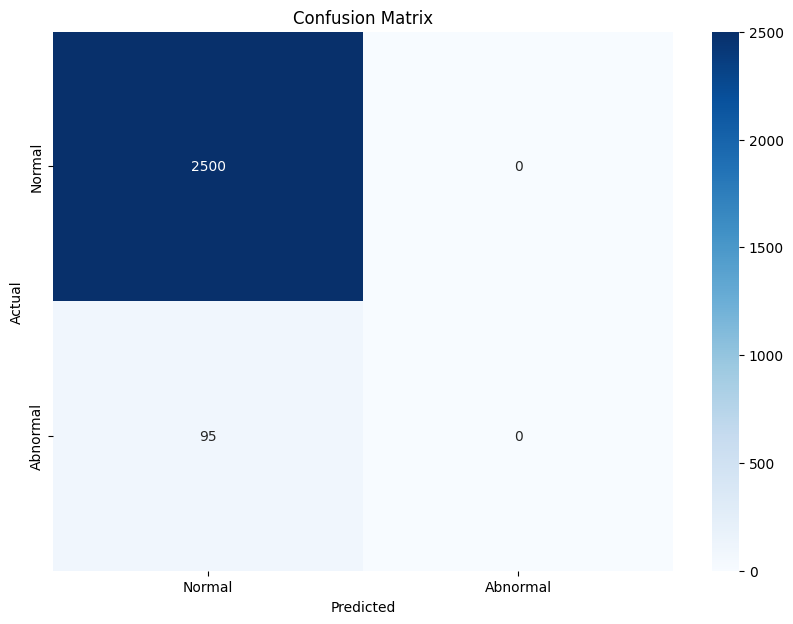

In [199]:
# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [200]:
# Classification Report
class_report = classification_report(all_labels, all_predictions, target_names=['Normal', 'Abnormal'])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Normal       0.96      1.00      0.98      2500
    Abnormal       0.00      0.00      0.00        95

    accuracy                           0.96      2595
   macro avg       0.48      0.50      0.49      2595
weighted avg       0.93      0.96      0.95      2595



/home/youngchan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/youngchan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/youngchan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
